In [2]:
#Import General Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tkinter as tk
from tkinter import filedialog

In [3]:
#Import ML Libraries
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

C:\Users\eucli\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
#Create Dialogbox and Open Data File
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename()
data = pd.read_csv(file_path,delimiter=' ',header=None)
data.rename(columns = {0: 'Data Set', 1: 'Time(s)',2: 'Conductance'},inplace=True)

In [151]:
#Remove conductance data, preprocess spectral data
spectral_data = data.drop(['Data Set','Time(s)','Conductance'],axis=1)
#Restrict clustering data to features between ~ 1200-1800 wavenumbers (400-600 pixels)
spectral_data = data.iloc[:,403:603]
conductance_data = data['Conductance'].apply(lambda x: np.log10(x))
spectral_data = normalize(spectral_data)

In [173]:
#SPECIFY NUMBER OF TEST CLUSTERS FOR INERTIA PLOT
test_clusters = 10

In [174]:
#Clustering, generate inertial plot
inertias = []
for k in range(1,test_clusters):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(spectral_data)
    inertias.append(kmeans.inertia_)

Text(0.5, 1.0, 'Kmeans Inertia Plot')

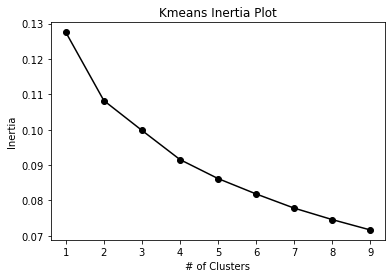

In [171]:
#Plot results
plt.plot(range(1,test_clusters),inertias,'ko-')
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')
plt.title('Kmeans Inertia Plot')

In [167]:
#Input Number of Desired Clusters
n_clusters = input("Specify desired number of clusters: ")
n_clusters = int(n_clusters)

Specify desired number of clusters: 2


In [154]:
#Cluster and generate plots
print(f"Performing K-Means Clustering for {n_clusters} Clusters")
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=20)
kmeans.fit(spectral_data)
km_clusters = kmeans.labels_
km_cluster_labels = kmeans.fit_predict(spectral_data)
km_unique, km_counts = np.unique(km_cluster_labels, return_counts=True)

Performing K-Means Clustering for 2 Clusters


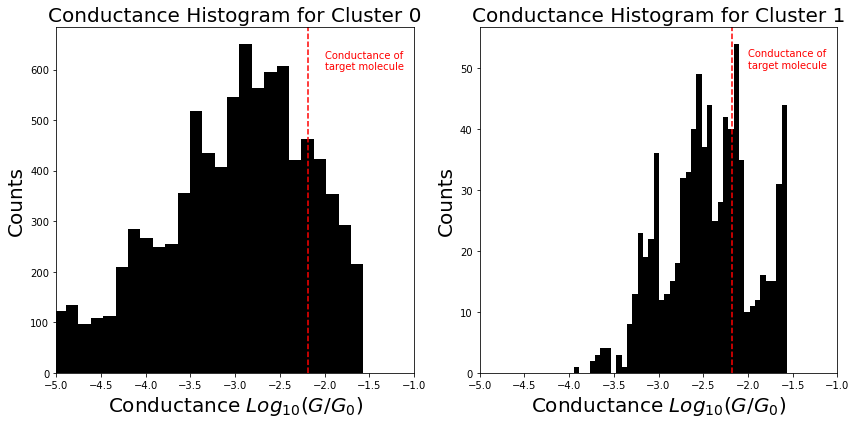

In [231]:
#Conductance Data was witheld from model. Check to see which cluster each
#conductance was assigned and compare with tunneling/set-point conductance and
#molecular conductance.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

idx = 0
x = [-2, -2]
y = [600, 50]

for ax in axes:
    ax.annotate('Conductance of\ntarget molecule',xy=(x[idx],y[idx]),fontsize=10,color='red')
    ax.hist(conductance_data[km_clusters==idx],bins=40,color='black')
    ax.axvline(x=-2.18,color='red',ls='--')
    ax.set_xlabel('Conductance $Log_{10}(G/G_{0})$',fontsize=20)
    ax.set_ylabel('Counts',fontsize=20)
    ax.set_title(f"Conductance Histogram for Cluster {idx}",fontsize=20)
    ax.set_xlim([-5, -1])
    idx += 1
    
fig
plt.tight_layout()

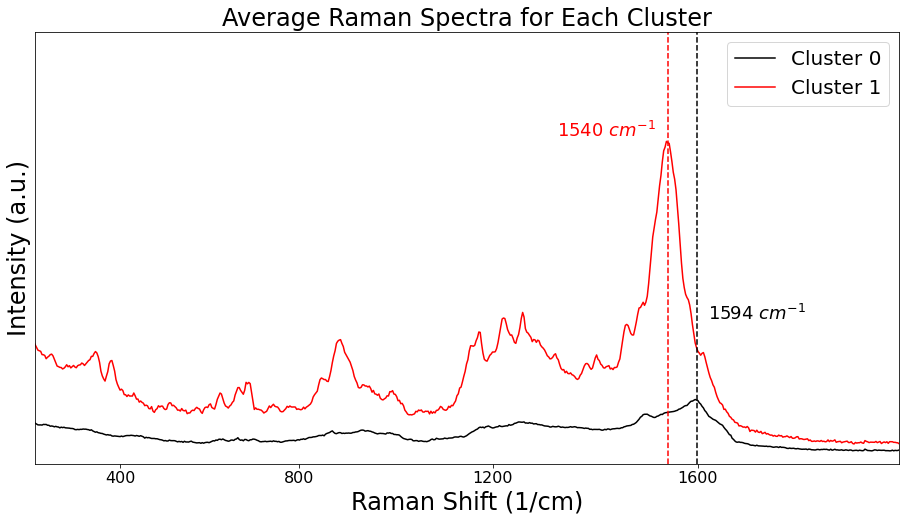

In [215]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_axes([0,0,1,1])

#Plot data average spectra for each cluster
ax.plot(data.drop(['Data Set','Time(s)','Conductance'],axis=1)[km_clusters==0].mean(axis=0),
        label='Cluster 0',color='black')
ax.plot(data.drop(['Data Set','Time(s)','Conductance'],axis=1)[km_clusters==1].mean(axis=0),
        label='Cluster 1',color='red')
ax.axvline(x=552,color='black',ls='--')
ax.axvline(x=531,color='red',ls='--')

#Set axis limits
ax.set_xlim([69,700])
ax.set_ylim([887,920])

#Label Axes
ax.set_xlabel('Raman Shift (1/cm)',fontsize=24)
ax.set_ylabel('Intensity (a.u.)',fontsize=24)
ax.set_title('Average Raman Spectra for Each Cluster',fontsize=24)

#Format Axes Ticks (Original ticks in units of pixels)
ax.set_xticks([131,262,403,553])
ax.set_xticklabels(['400','800','1200','1600'],fontsize=16)
ax.set_yticks([])

#Annotate Plot
ax.annotate('1540 $cm^{-1}$',xy=(450,912),xycoords='data',fontsize=18,color='red')
ax.annotate('1594 $cm^{-1}$',xy=(560,898),xycoords='data',fontsize=18,color='black')

ax.legend(fontsize=20)